In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import gridspec
from sklearn.cluster import OPTICS, cluster_optics_dbscan
from sklearn.preprocessing import normalize, StandardScaler
write_path = os.getcwd() + '/Output'
corr_df = pd.read_csv(write_path + '/Corr_DF_pearson.csv')
corr_df.rename(columns = {'Unnamed: 0' : 'Country'}, inplace = True)
corr_df.set_index(corr_df.columns[0], inplace=True)

#print(corr_df)
country_col = corr_df.index
print(country_col)
scaler = StandardScaler()
corr_df = corr_df.fillna(method ='ffill')
corr_df = corr_df.fillna(value = 0)
#print(corr_df)
df_scaled = scaler.fit_transform(corr_df)
#print(df_scaled)
df_normalized = normalize(df_scaled)
df_normalized = pd.DataFrame(df_normalized)
df_normalized.index.names = corr_df.index.names
df_normalized.columns = corr_df.columns
#df_normalized.head()
#print(df_scaled)
print(df_normalized)

Index(['El Salvador', 'Egypt', 'Tajikistan', 'North Macedonia', 'Afghanistan',
       'Armenia', 'Barbados', 'Paraguay', 'Switzerland', 'Chad',
       ...
       'Fiji', 'Finland', 'Nicaragua', 'Palau', 'Suriname', 'Jordan',
       'Mongolia', 'Netherlands', 'Burkina Faso', 'Guyana'],
      dtype='object', name='Country', length=179)
         AgriShareGDP  CreditToAgriFishForest  EmploymentRural  TotalAgri  \
Country                                                                     
0            0.086754               -0.128664         0.007491  -0.058676   
1            0.096979               -0.173376         0.010094   0.132413   
2            0.078721               -0.140734         0.008194   0.041417   
3            0.130194               -0.160843         0.009364  -0.138741   
4           -0.155197               -0.172754         0.010058  -0.149015   
...               ...                     ...              ...        ...   
174          0.735521               -0.167694   

In [109]:
from sklearn.manifold import TSNE
import seaborn as sns
tsne = TSNE(n_components = 2, perplexity = 5, n_iter = 1000, learning_rate = 30.0, init = 'pca')
tsne_result = tsne.fit_transform(df_normalized)
new_df_tsne = pd.DataFrame(np.hstack((np.array(country_col).reshape(-1, 1), tsne_result)), columns = ['Country', '1st_component', '2nd_component'])
new_df_tsne.set_index('Country', inplace = True)
print(new_df_tsne)

c:\Users\smanoles\Documents\GitHub\python-data-driven-decisions\.venv\lib\site-packages\sklearn\manifold\_t_sne.py:991: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


                1st_component 2nd_component
Country                                    
El Salvador        -15.577775    -41.566803
Egypt               36.610718     -9.804752
Tajikistan          25.389273     -1.837566
North Macedonia     30.539873      3.276659
Afghanistan         31.969582      6.507414
...                       ...           ...
Jordan             -14.046346     14.601672
Mongolia           -12.925341      1.432073
Netherlands         29.874996      9.265524
Burkina Faso       -21.021152     22.036589
Guyana             -39.101753    -14.957648

[179 rows x 2 columns]


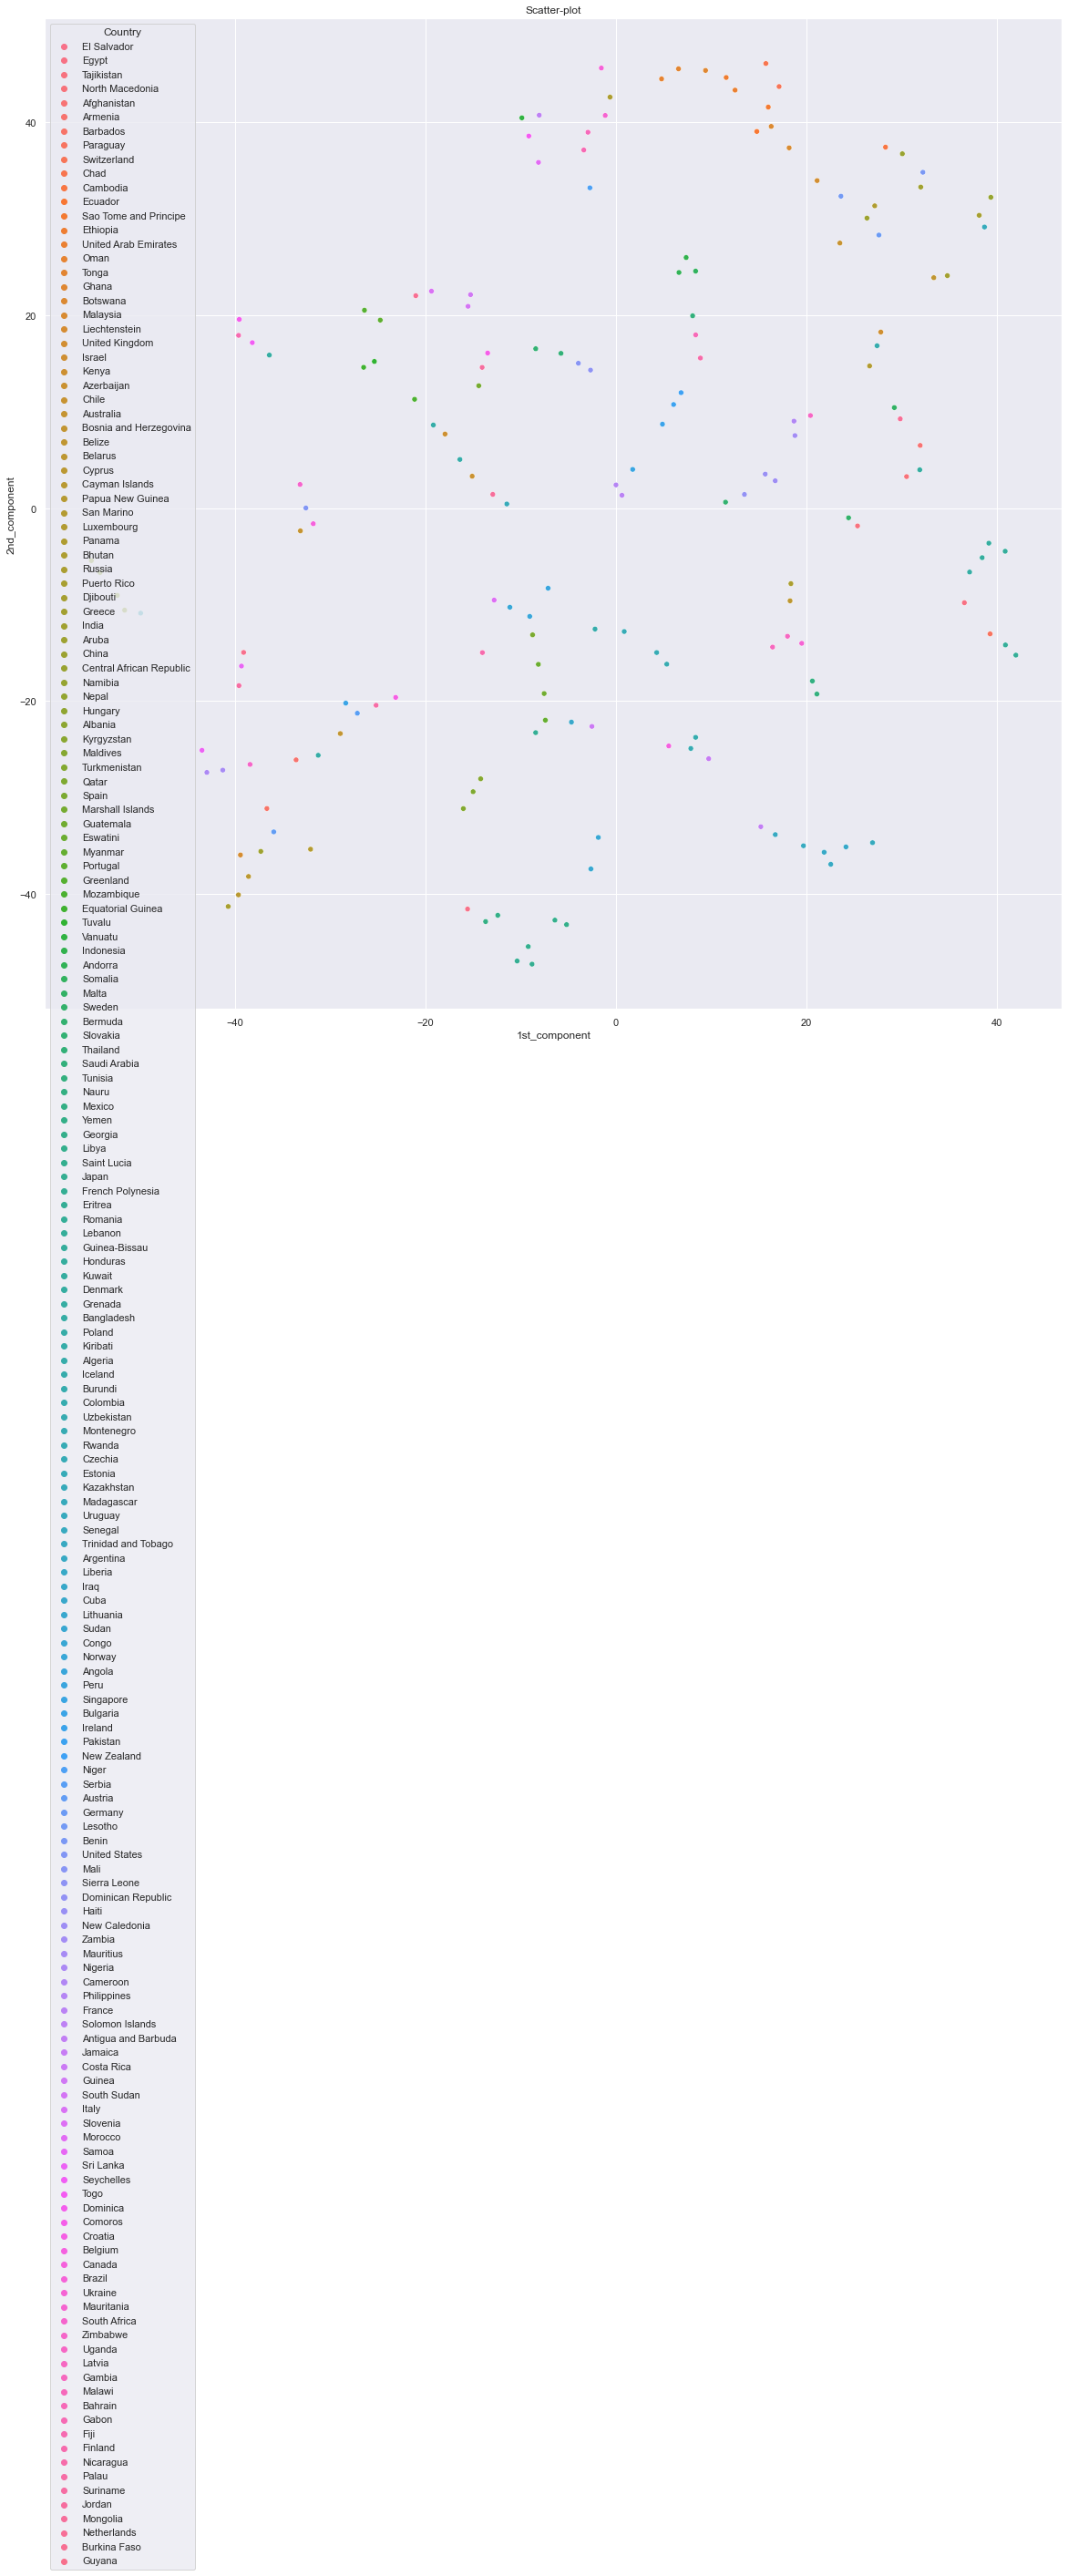

In [110]:
#plotting data

sns.scatterplot(data = new_df_tsne, x = '1st_component', y = '2nd_component', hue='Country')
plt.title('Scatter-plot')
plt.show()

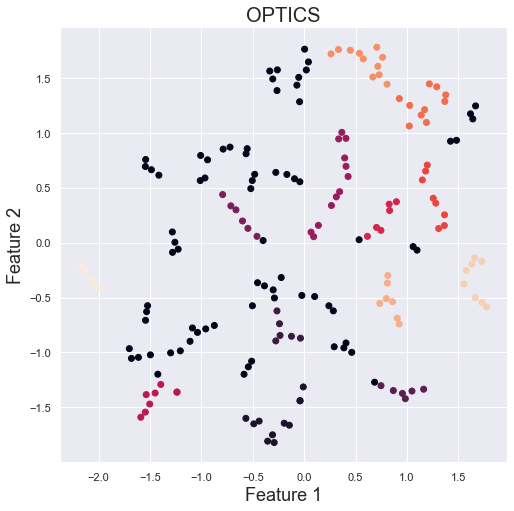

In [111]:

X_optics = pd.DataFrame(StandardScaler().fit_transform(new_df_tsne))

'''Apply OPTICS'''
optics = OPTICS(xi=.15, min_cluster_size=5, min_samples=5).fit(X_optics)
labels_optics = optics.labels_

plt.figure(figsize=(8,8))
plt.title('OPTICS',fontsize= 20)
plt.xlabel('Feature 1',fontsize= 18)
plt.ylabel('Feature 2',fontsize= 18)
fig = plt.scatter(X_optics[0], X_optics[1], c= labels_optics)


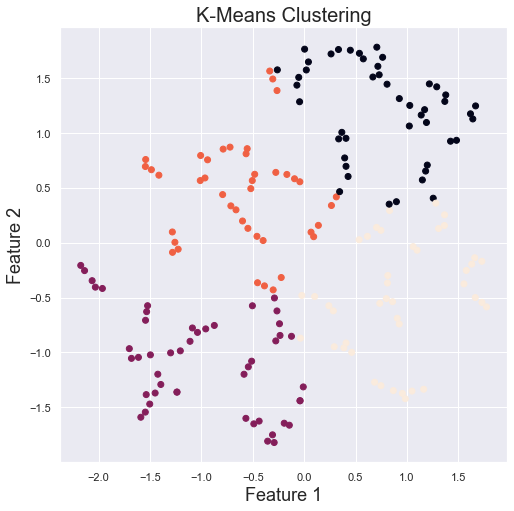

In [112]:

X_kmeans = pd.DataFrame(StandardScaler().fit_transform(new_df_tsne))
X_kmeans.index = new_df_tsne.index
'''Apply K-Means'''
from sklearn.cluster import *
from sklearn.mixture import GaussianMixture


kmean_clusters =   MiniBatchKMeans(n_clusters=4).fit_predict(X_kmeans)

plt.figure(figsize = (8,8))
plt.title('K-Means Clustering',fontsize= 20)
plt.xlabel('Feature 1', fontsize=18)
plt.ylabel('Feature 2', fontsize=18)
f = plt.scatter(X_kmeans[0],X_kmeans[1],c=kmean_clusters)

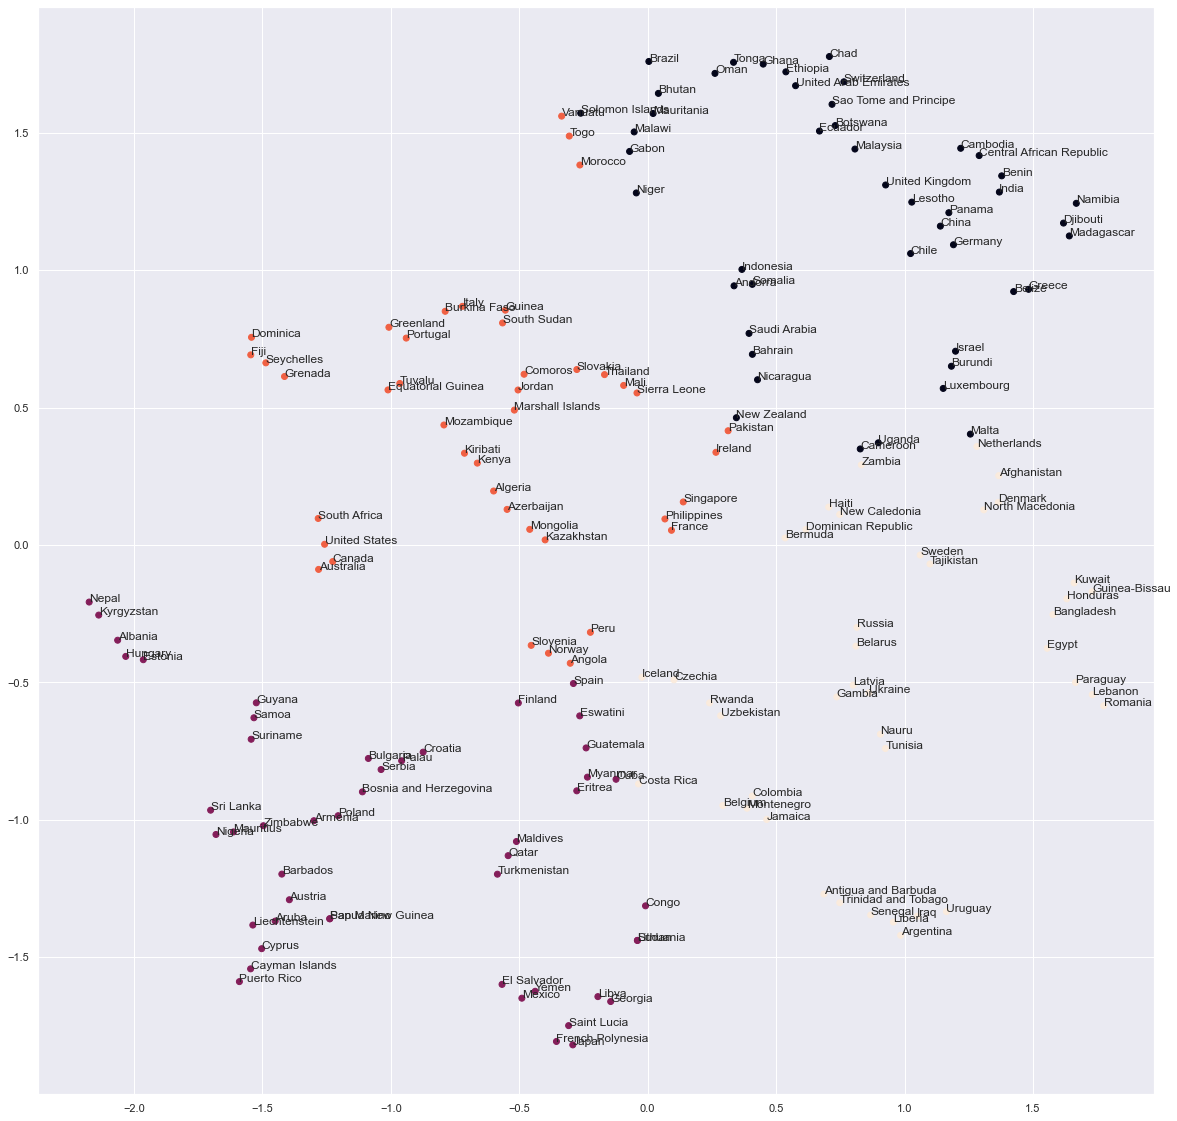

In [113]:
sns.set(rc={'figure.figsize':(20, 20)})


z = X_kmeans[0]
y = X_kmeans[1]
n = new_df_tsne.index.get_level_values(0)
fig, ax = plt.subplots()

ax.scatter(z, y, c=kmean_clusters)



for i, txt in enumerate(n):
    ax.annotate(txt, (z[i], y[i]))

In [108]:
new_df_tsne.loc[new_df_tsne.index.get_level_values(0) == 'Australia']

,1st_component,2nd_component
Country,,
Australia,26.856747,10.694401


In [218]:
X_kmeans[X_kmeans.index.get_level_values(0) == 'Australia']

,0,1
Country,,
Australia,-1.032678,-1.775133
